In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv("../../../Daten_Tübingen_Mieten_Kaufen/Tübingen_mieten_kaufen.csv", sep=";", encoding='unicode_escape', decimal=",")
df.columns.size

86

## In welchen Monaten werden am meisten Wohnungen online gestellt?

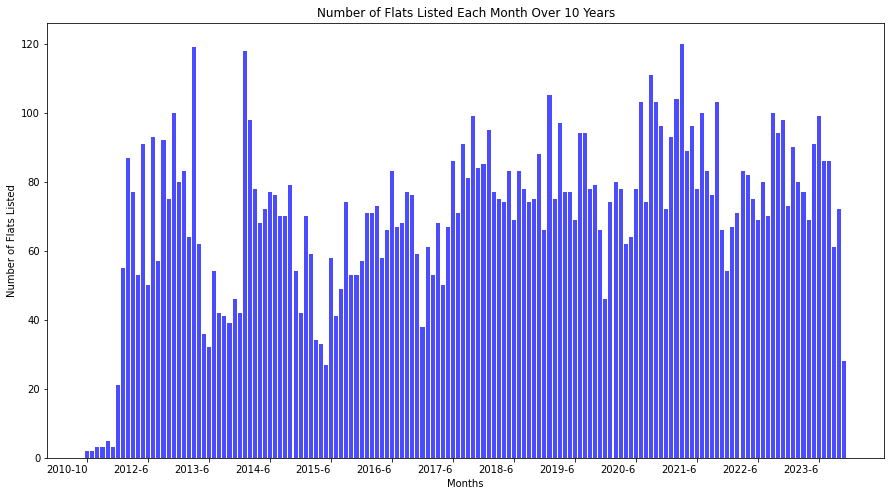

In [26]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))
plt.bar(monthly_counts.index, monthly_counts['count'], color='blue', alpha=0.7)

plt.title('Number of Flats Listed Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Number of Flats Listed')

tick_positions = monthly_counts.index[::12] 
tick_labels = [f"{year}-{month}" for year, month in zip(monthly_counts['year'][tick_positions], monthly_counts['month'][tick_positions])]
plt.xticks(tick_positions, tick_labels, ha='right')

plt.show()

#kde=True
# sns.histplot(data=df, x="startdate",bins=12)
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


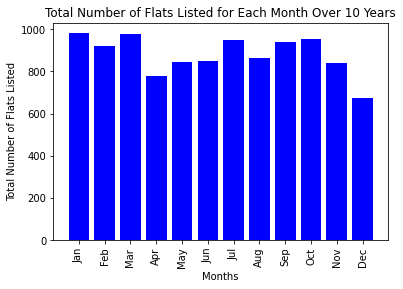

In [27]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

## In welchen Monaten werden Inserate am öftesten rausgenommen?

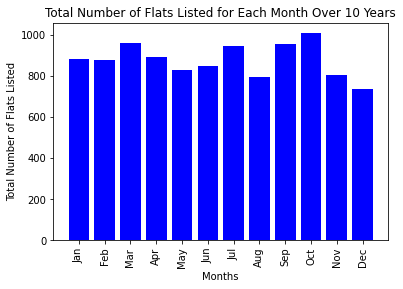

In [28]:
df['year'] = df['enddate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['enddate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

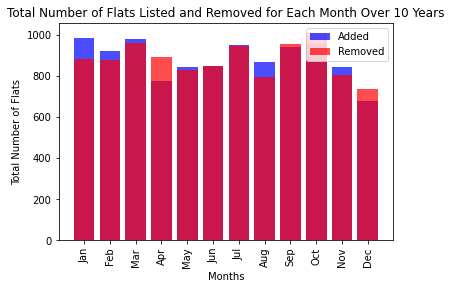

In [29]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

df['year_removed'] = df['enddate'].str[:4]
df["month_removed"] = pd.DatetimeIndex(df['enddate']).month
monthly_removed_counts = df.groupby(['year_removed', 'month_removed']).size().reset_index(name='removed_count')
monthly_removed_counts_summed = monthly_removed_counts.groupby('month_removed')['removed_count'].sum().reset_index(name='total_removed_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue', alpha=0.7, label='Added')
plt.bar(monthly_removed_counts_summed['month_removed'], monthly_removed_counts_summed['total_removed_count'], color='red', alpha=0.7, label='Removed')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')
plt.legend()
plt.show()

## Welche Inserate bleiben wie lange drin?

       startdate    enddate  duration_days
5     2023-11-13 2023-11-14              1
10    2023-11-10 2023-11-13              3
11    2023-11-09 2023-11-11              2
15    2023-11-05 2023-11-17             12
17    2023-11-04 2023-11-15             11
...          ...        ...            ...
10569 2011-08-02 2012-03-11            222
10570 2011-07-25 2012-01-23            182
10571 2011-07-23 2012-04-15            267
10572 2010-10-15 2014-05-15           1308
10573 2010-10-15 2014-05-15           1308

[10531 rows x 3 columns]


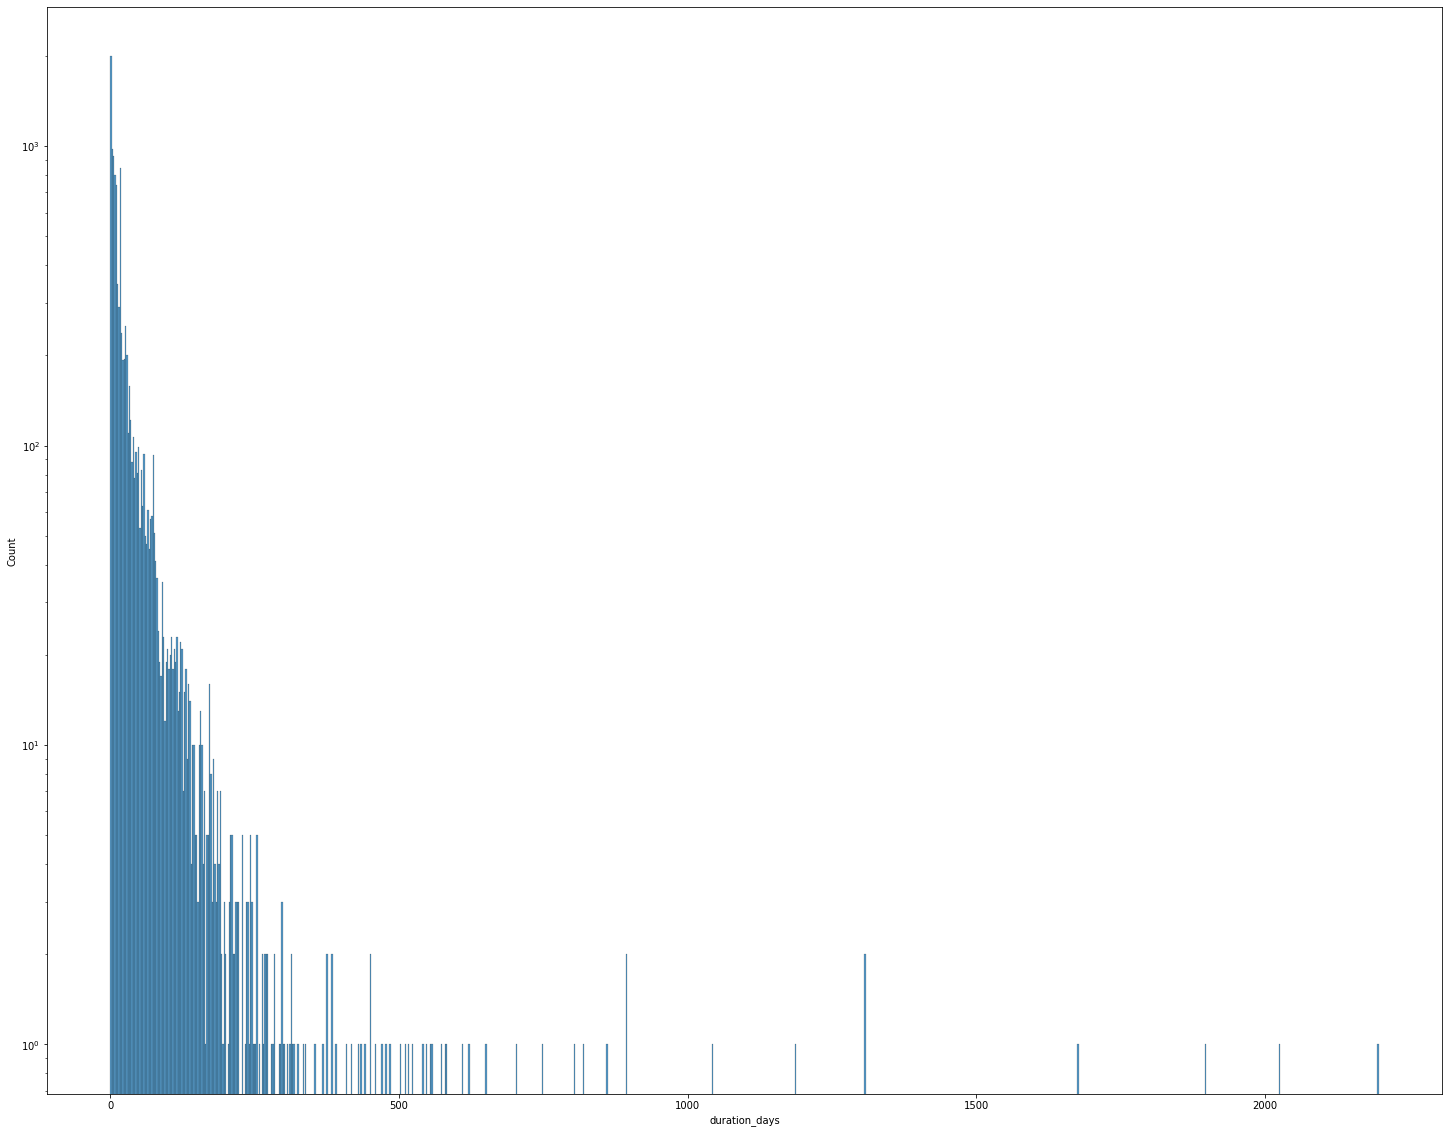

In [23]:
df= df.dropna(subset=['startdate', 'enddate'])

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['duration'] = df['enddate'] - df['startdate']
df['duration_days'] = df['duration'].dt.days

print(df[['startdate', 'enddate', 'duration_days']])
plt.subplots(figsize=(25, 20))
sns.histplot(data=df, x="duration_days")
plt.yscale('log')